<div style="border:solid green 2px; padding: 20px">
<b>Привет Евгений!</b>

Меня зовут  Евгений Арзамасцев, я твой тимлид по этому проекту. Буду проверять следующие этапы твоей работы:
<p> * План работ и уточняющие вопросы
<p> * Основной код разработки модели
<p> * Отчет о проделанной работе

 Предлагаю общаться на «ты» :) Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать отличным специалистом по Data Science. Ты уже проделал большую работу над проектами этого курса. Сейчас у тебя Финальный Спринт - дипломная работа. Моя цель - помочь тебе сделать ее максимально качественно, чтобы было не стыдно ссылаться на данную работу в своем резюме!

Ниже ты найдешь мои комментарии - **пожалуйста, не перемещай, не изменяй и не удаляй их**. Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой начальник будет поступать так же, а я пытаюсь подготовить тебя именно к таким ситуациям. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий тимлида ❌:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий тимлида ⚠️:</b> Так выделены небольшие замечания. Я надеюсь, что их ты тоже учтешь - твой проект от этого станет только лучше. Но настаивать на их отработке не буду.

</div>

<div class="alert alert-success">
<b>Комментарий тимлида ✔️:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом.** Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

# Прогнозирование оттока клиентов оператора связи «Ниединогоразрыва.ком»

Оператор связи «Ниединогоразрыва.ком» предоставляет два основных типа услуг: стационарную телефонную связь и подключение к Интернету. Необходимо построить модель для предсказания ухода клиентов от оператора, с целью предложения потенциально планирующим отказ от услуг клиентам промокодов и специальных условий.

Данные о клиентах состоят из файлов, полученных из разных источников:

- `contract_new.csv` — информация о договоре;
- `personal_new.csv` — персональные данные клиента;
- `internet_new.csv` — информация об интернет-услугах;
- `phone_new.csv` — информация об услугах телефонии.

<div class="alert alert-success">
<b>**Комментарий тимлида ✔️:**</b>

В описательной части есть название, общее описание проекта. Есть даже короткое описание исходных данных. Отлично!
    
</div>

<div class="alert alert-warning">
<b>**Комментарий тимлида ⚠️:**</b>

Данное исследование можно будет приложить к портфолио и показывать потенциальным работодателям на собесах. По этому предлагаю сразу же оформлять его в соответствии с требованиями к исследованию. В описательной части не хватает:
    
- четко сформулированной цели проекта
    
Касаемо цели - я рекомендую ее немного изменить и привести в соответствие с требованиями SMART. Если интересно - почитай вот тут https://www.carrotquest.io/blog/smart-goal/. Можно привести SMARTированную цель проекта уже потом, на следующем этапе.
    
Рекомендую доработать этот раздел.
</div>

In [1]:
pip install scikit-learn==1.1.3

     |████████████████████████████████| 30.8 MB 46 kB/s  eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install phik

     |████████████████████████████████| 679 kB 1.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install imblearn

     |████████████████████████████████| 226 kB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 42.6 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import phik

from phik.report import plot_correlation_matrix
from phik import report
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score
from sklearn.preprocessing import (
    OneHotEncoder, 
    OrdinalEncoder,
    StandardScaler
)
from sklearn.metrics import ( 
    confusion_matrix, 
    roc_auc_score, 
    accuracy_score,
    roc_curve,
    ConfusionMatrixDisplay
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import (
    GridSearchCV, 
    RandomizedSearchCV,
    train_test_split
)
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from scipy import stats as st

ModuleNotFoundError: No module named 'phik'

## План работы

### Анализ данных

Для ознакомления с данными, открываем файлы и выводим статистическую информацию:

___contract_new.csv:___

In [5]:
contract = pd.read_csv('/datasets/contract_new.csv')

Сэмпл:

In [6]:
contract.sample(5)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6129,4132-POCZS,2015-10-01,No,Month-to-month,Yes,Electronic check,39.90,2074.8
3526,9026-RNUJS,2019-07-01,No,Month-to-month,No,Electronic check,50.35,352.45
5886,1709-EJDOX,2016-03-01,2019-02-01,Two year,No,Mailed check,19.75,691.25
3447,9762-YAQAA,2016-11-01,No,One year,No,Credit card (automatic),81.40,3174.6
2922,3348-CFRNX,2017-07-01,2019-06-01,Month-to-month,Yes,Mailed check,92.35,2272.73


In [7]:
contract.duplicated().sum()

0

Информация о файле:

In [8]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


Статистики:

In [9]:
contract[contract.dtypes[contract.dtypes == "object"].index].describe()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,TotalCharges
count,7043,7043,7043,7043,7043,7043,7043
unique,7043,77,67,3,2,4,6658
top,4423-JWZJN,2014-02-01,No,Month-to-month,Yes,Electronic check,
freq,1,366,5942,3875,4171,2365,11


In [10]:
contract[contract.dtypes[contract.dtypes != "object"].index].describe()

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


Диаграммы:

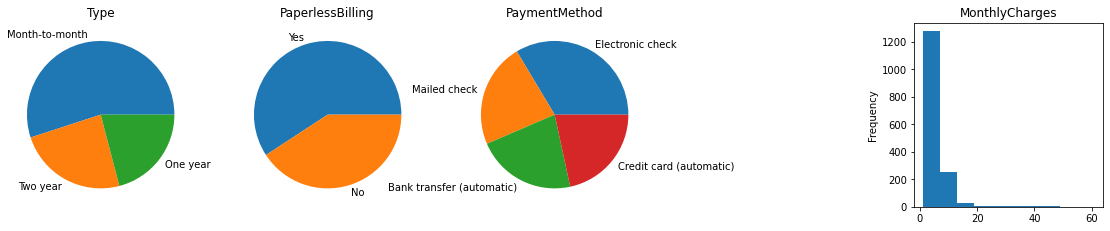

In [11]:
fig = plt.figure(figsize=(40,40))
j = 0
for i in contract.dtypes[contract.dtypes == 'object'].index:
    j += 1
    if contract[i].value_counts().shape[0] < 10:
        fig.add_subplot(10, 10, j+1)
        contract[i].value_counts().plot.pie(ylabel='', title=i)
j += 1
for i in contract.dtypes[contract.dtypes == 'float64'].index:
    fig.add_subplot(10, 10, j+1)
    contract[i].value_counts().plot.hist(ylabel='', title=i)

___personal_new.csv:___

In [4]:
personal = pd.read_csv('/datasets/personal_new.csv')

Сэмпл:

In [13]:
personal.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents
6117,3308-DGHKL,Male,0,No,No
1703,8158-WPEZG,Male,0,No,No
1462,9824-QCJPK,Male,0,Yes,No
4802,9972-NKTFD,Female,0,No,No
6775,3259-KNMRR,Male,1,No,No


In [14]:
personal.duplicated().sum()

0

Информация о файле:

In [15]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


Статистики:

In [16]:
personal[personal.dtypes[personal.dtypes == "object"].index].describe()

,customerID,gender,Partner,Dependents
count,7043,7043,7043,7043
unique,7043,2,2,2
top,4423-JWZJN,Male,No,No
freq,1,3555,3641,4933


In [17]:
personal[personal.dtypes[personal.dtypes != "object"].index].describe()

,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Диаграммы:

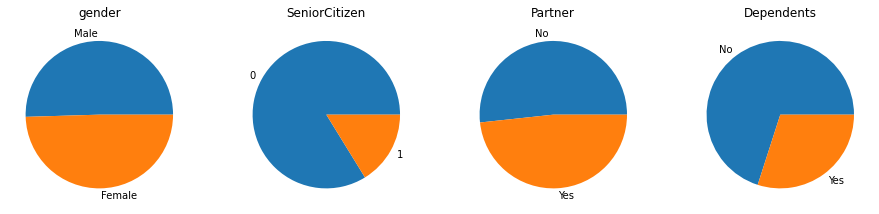

In [18]:
fig = plt.figure(figsize=(40,40))
j = 0
for i in personal.columns:
    j += 1
    if personal[i].value_counts().shape[0] < 10:
        fig.add_subplot(10, 10, j+1)
        personal[i].value_counts().plot.pie(ylabel='', title=i)

___internet_new.csv:___

In [6]:
internet = pd.read_csv('/datasets/internet_new.csv')

In [7]:
internet.to_csv('internet_new.csv')

Сэмпл:

In [20]:
internet.sample(5)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
344,8734-DKSTZ,Fiber optic,No,No,No,No,No,Yes
1357,5515-RUGKN,DSL,No,No,No,No,No,Yes
2964,0064-YIJGF,Fiber optic,No,No,No,No,No,No
4472,2325-WINES,Fiber optic,No,Yes,Yes,No,Yes,Yes
1295,1478-VPOAD,DSL,No,No,No,No,No,No


In [21]:
internet.duplicated().sum()

0

Информация о файле:

In [22]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


Статистики:

In [23]:
internet.describe()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,5155-AZQPB,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


Диаграммы:

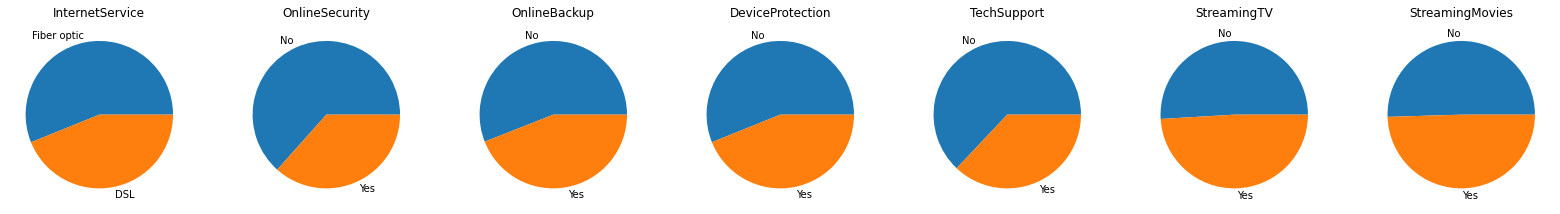

In [24]:
fig = plt.figure(figsize=(40,40))
j = 0
for i in internet.columns:
    j += 1
    if internet[i].value_counts().shape[0] < 10:
        fig.add_subplot(10, 10, j+1)
        internet[i].value_counts().plot.pie(ylabel='', title=i)

___phone_new.csv:___

In [25]:
phone = pd.read_csv('/datasets/phone_new.csv')

Сэмпл:

In [26]:
phone.sample(5)

,customerID,MultipleLines
6254,8267-ZNYVZ,No
3157,4840-ORQXB,Yes
2147,7874-ECPQJ,No
3604,7404-JLKQG,No
3970,2718-YSKCS,No


Информация о файле:

In [27]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [28]:
phone.duplicated().sum()

0

Статистики:

In [29]:
phone.describe()

,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,2277-AXSDC,No
freq,1,3390


Диаграммы:

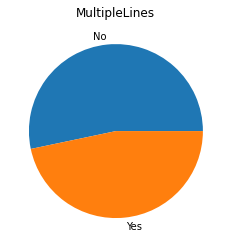

In [30]:
phone['MultipleLines'].value_counts().plot.pie(ylabel='', title='MultipleLines');

В файлах отсутствуют пропуски и дубликаты. По графикам видно, что данные адекватны.
Целевой признак находится в таблице `contract_new.csv`, столбец `EndDate`.

### План исследования

Для достижения цели проекта необходимо выполнить следующие шаги:
 - Объединить таблицы и глубже проанализировать сводные данные
 - Подготовить данные для обучения разных моделей
 - Обучить и выбрать лучшую модель по метрике ROC-AUC
 - Протестировать выбранную модель

<div class="alert alert-success">
<b>**Комментарий тимлида ✔️:**</b>

Есть план работ. Указанны все основные этапы исследования! Лучше конечно оформить его ввиде отдельного раздела - план исследования. Вижу что понимаешь что предстоит делать, уверен инструментарий тоже подберешь верно!
</div>

Метрика ROC-AUC для необходимого результата должна быть выше 0,85.

__Вопросы для уточения: ВОПРОСОВ НЕТ__

<div class="alert alert-success">
<b>**Комментарий тимлида ✔️:**</b>

Есть план, есть уточняющие вопросы, (вернее их не осталось), есть предварительное исследование данных. 

Отлично, работу приниаю, переходи к следующему этапу исследования - разработка модели.
</div>

<div class="alert alert-success">
   
----
<div align="center"> <b>=====    Новый этап работы - "РАЗРАБОТКА МОДЕЛИ". Нумерация комментариев с этого момента начинается ЗАНОВО    =====</b></div>

----
    
</div>

## Код решения

### Разведочный анализ данных

Соединяем файлы в единую таблицу:

In [31]:
data = contract.merge(personal, how='outer').merge(internet, how='outer').merge(phone, how='outer')

<div class="alert alert-success">
<b>**Комментарий тимлида ✔️:**</b>

Ок, есть объединение таблиц. Можно было использовать более короткий вариант - join([таблица1, таблица2....]), для этого предварительно указав индексом cutomerID, который как раз в качестве индекса и подходит.
</div>

In [32]:
data.sample(5)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
2997,1891-FZYSA,2014-03-01,2018-09-01,Month-to-month,Yes,Electronic check,89.95,5197.31,Male,1,Yes,No,Fiber optic,No,Yes,No,No,Yes,No,Yes
1263,6818-WOBHJ,2014-05-01,2016-12-01,Month-to-month,Yes,Bank transfer (automatic),89.60,3027.58,Female,1,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Yes
6238,5188-HGMLP,2015-08-01,No,Month-to-month,No,Bank transfer (automatic),74.00,4035.96,Male,1,Yes,No,Fiber optic,No,No,No,No,No,No,Yes
6447,8782-NUUOL,2015-02-01,No,One year,No,Mailed check,79.00,4740.0,Male,0,No,No,DSL,Yes,No,Yes,Yes,Yes,Yes,No
450,8592-PLTMQ,2014-10-01,No,One year,No,Mailed check,24.70,1580.8,Female,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechSupport       5517 non-null   object 


Переименуем названия столбцов:

In [34]:
def snake_name(name):
    name = re.sub(r'(?=[A-Z])', '_', name).lower()
    name = re.sub(r'(\A[_])', '', name)
    name = re.sub(r'([_][a-z][_][a-z])', name[-4] + name[-3] + name[-1], name)
    return name

In [35]:
data = data.rename(snake_name, axis='columns')

In [36]:
data.columns

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'gender',
       'senior_citizen', 'partner', 'dependents', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'multiple_lines'],
      dtype='object')

<div class="alert alert-success">
<b>**Комментарий тимлида ✔️:**</b>

Отлично, названия приведены к одному типу.    
Кстати, есть неплохая библиотека для выполнения  рутинных операций в пандасе - https://pypi.org/project/skimpy/. Там же есть функция clean_column() котороая в одно действие выполняет приведение названий колонок к соответствующему виду.
    
</div>

Приводим данные к верным типам:

Столбец `begin_date` в `datetime64`:

In [37]:
data['begin_date'] = data['begin_date'].astype('datetime64')

<div class="alert alert-success">
<b>**Комментарий тимлида ✔️:**</b>

Отлично, есть приведение признаков к правильному типу!
</div>

Проверим значения в столбце `end_date`:

In [38]:
data['end_date'].value_counts()

No            5942
2020-01-01      39
2019-12-01      38
2018-11-01      35
2019-09-01      32
              ... 
2015-04-01       2
2014-12-01       2
2014-06-01       1
2014-10-01       1
2014-11-01       1
Name: end_date, Length: 67, dtype: int64

In [39]:
data.loc[data['end_date'] != 'No', 'end_date'].sort_values(ascending=False).head(10)

5439    2020-01-01
4268    2020-01-01
6584    2020-01-01
481     2020-01-01
5798    2020-01-01
2022    2020-01-01
5334    2020-01-01
6302    2020-01-01
4235    2020-01-01
1480    2020-01-01
Name: end_date, dtype: object

Заменяем значения `No` на дату выгрузки данных, после приводим данные к типу `datetime64`:

In [40]:
data['end_date'].replace('No', value='2020-02-01', inplace=True)

In [41]:
data['end_date'] = data['end_date'].astype('datetime64')

<div class="alert alert-success">
<b>**Комментарий тимлида ✔️:**</b>

Отлично, заполнение пропусков в датах, и приведение признаков к правильному типу!
</div>

Проверяем данные в столбце `total_charges`:

In [42]:
data['total_charges'].value_counts()

           11
20.45       6
101.0       5
19.65       4
255.0       4
           ..
240.36      1
5399.55     1
7301.0      1
4327.08     1
5681.5      1
Name: total_charges, Length: 6658, dtype: int64

In [43]:
data.loc[data['total_charges'].str.isspace()]

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
488,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,,Female,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,NaN
753,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,,Male,0,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
936,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,No
1082,4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
1340,1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,NaN
3331,7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3826,3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
4380,2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,,Female,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
5218,2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
6670,4075-WKNIU,2020-02-01,2020-02-01,Two year,No,Mailed check,73.35,,Female,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Yes


Все данные с пропущенными `total_charges` с датой начала действия договора `2020-02-01`. Переносим данные из `monthly_charges` в `total_charges`:

In [44]:
data.loc[
    data['total_charges'].str.isspace(), 'total_charges'
] = data.loc[
    data['total_charges'].str.isspace(), 'monthly_charges'
]

<div class="alert alert-success">
<b>**Комментарий тимлида ✔️:**</b>

Отлично, есть работа с пропусками. Удалось определить причину их возникновения. Да, заполнение возможно как  monthly_charges, так и 0. Так же допустимо просто удалить строки с пропусками - их у нас не много. 
</div>

Приводим данные к типу `float64`:

In [45]:
data['total_charges'] = data['total_charges'].astype('float64')

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   int64         
 10  partner            7043 non-null   object        
 11  dependents         7043 non-null   object        
 12  internet_service   5517 non-null   object        
 13  online_security    5517 non-null   object        
 14  online_b

Типы соответсвуют данным.

Для анализа, а также для лучшего обучения моделей создаем новые признаки:

Срок пользования услугами в днях:

In [47]:
data['action_time'] = ((data['end_date'] - data['begin_date']) / np.timedelta64(1, 'D')).astype('int')

<div class="alert alert-success">
<b>**Комментарий тимлида ✔️:**</b>

Отлично, создан новый синтетический признак!
</div>

Использование телефонной связи:

In [48]:
data['phone'] = np.where(data['multiple_lines'].isna(), 0, 1)

<div class="alert alert-success">
<b>**Комментарий тимлида ✔️:**</b>

Отлично, создан новый синтетический признак!
</div>

Факт ухода клиента (целевой признак):

In [49]:
data['leave'] = np.where(data['end_date'] != '2020-02-01', 1, 0)

<div class="alert alert-success">
<b>**Комментарий тимлида ✔️:**</b>

Отлично, целевой признак создан!
</div>

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   int64         
 10  partner            7043 non-null   object        
 11  dependents         7043 non-null   object        
 12  internet_service   5517 non-null   object        
 13  online_security    5517 non-null   object        
 14  online_b

Оставшиеся пропуски заменяем `No`:

In [51]:
data.fillna('No', inplace=True)

<div class="alert alert-success">
<b>**Комментарий тимлида ✔️:**</b>

Да, все верно. У тебя есть бинарные признаки (Yes/No) и в случае добавления к ним еще одного значения, например Unknown или NA модель может запутаться.  Получается что бинарные признаки превратятся уже не в бинарные, а в обычные номинальные - с тремя категориями: NAN, Yes, No. В чем разница для модели NAN и No? Хорошо что меняешь именно на No. 

Но тут есть момент - в столбце `multiple_lines` есть значения Yes/No. Получается столбец говорит о наличии разного типа подключения к телефонии. При объединении таблиц, в данном столбце появляются пропуски, которые говорят о том, что у клиента НЕТ услуг телефонии вообще. Заполняя данный столбец No ты приравниваешь клиентов с телефонией-одна линия, с клиентами у которых вообще нет телефона.  Думаю это не сильно повлияет на качество модели, но держать в голове это стоит.
</div>

In [52]:
data.isna().sum()

customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
gender               0
senior_citizen       0
partner              0
dependents           0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
multiple_lines       0
action_time          0
phone                0
leave                0
dtype: int64

Посмотрим на различия в признаках в зависимости от целевого признака:

Таблица для призаков с численными типами данных:

In [53]:
data.groupby('leave').mean()

,monthly_charges,total_charges,senior_citizen,action_time,phone
leave,,,,,
0,62.763455,2067.943095,0.153147,893.681084,0.902558
1,75.546004,2371.377275,0.210718,924.863760,0.906449


Графики для категориальных призаков:

На графиках изображены 95% доверительные интервалы вероятности ухода клиента в зависимости от значения признаков.

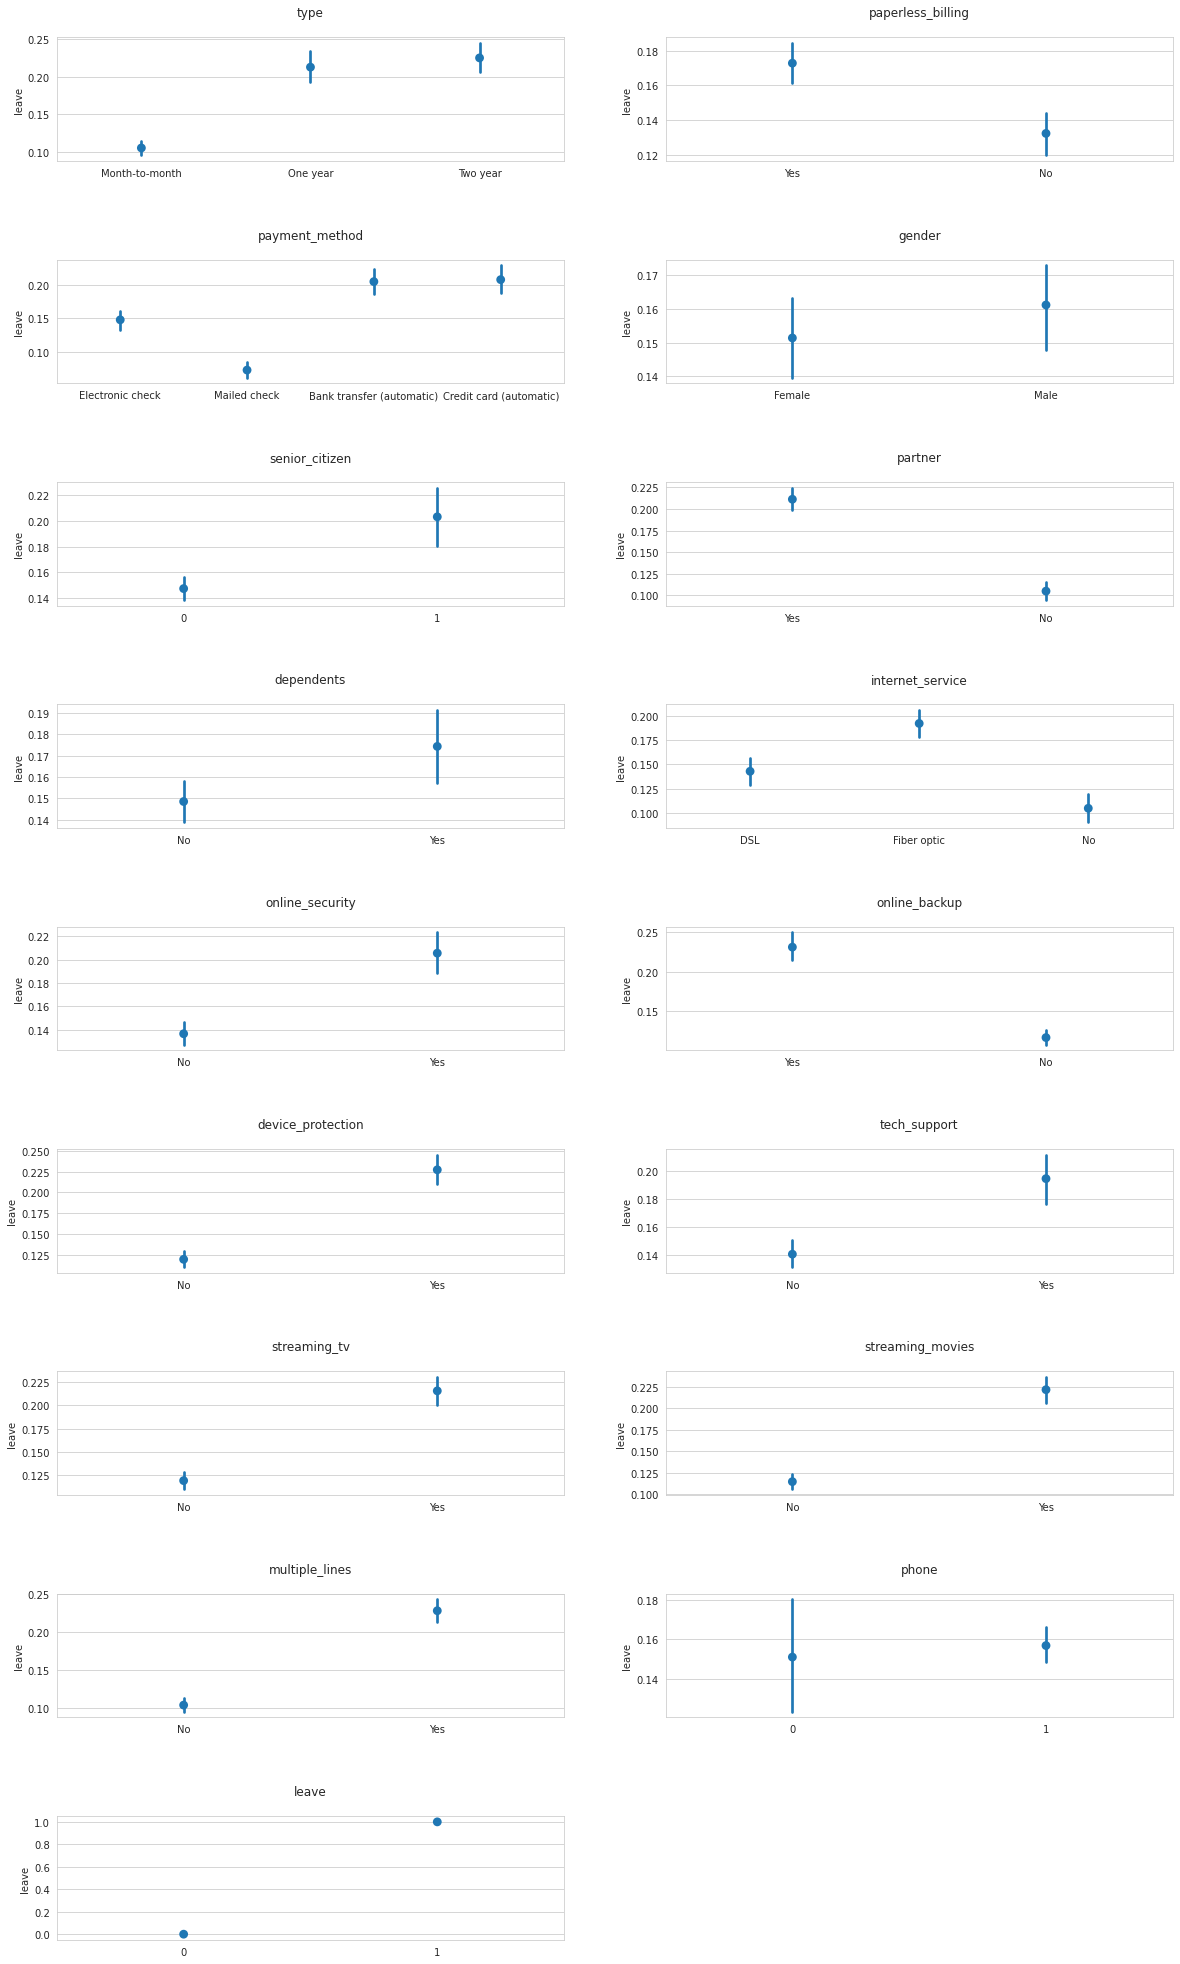

In [54]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 35))
plt.subplots_adjust(wspace = 0.2, hspace = 0.8)
j = 0
for i in data.nunique()[data.nunique() < 5].index:
    plt.subplot(9, 2, j+1)
    g = sns.pointplot(data=data, x=i , y='leave', join=False)
    g.set(xlabel=None, title=i+'\n', )
    j += 1

По данным графикам можно увидеть, что уходящие клиенты чаще других:
 - имеют долгосрочные договоры (на один или два года)
 - получают бумажные чеки
 - оплачивают услуги с помощью автоматических списаний
 - являются пенсионерами
 - состоят в браке
 - имеют детей
 - пользуются подключением к интернету
 - пользуются какой-либо из дополнительных услуг

<div class="alert alert-success">
<b>**Комментарий тимлида ✔️:**</b>

Хороший разведочный анализ. Как результат – сформирован портрет ушедшего клиента, что крайне важно для бизнеса (отдел маркетинга будет очень рад этой информации)
</div>

Проверим зависимость количествпенных признаков от факта ухода клиента:

In [55]:
def histogram(feature, title):
    out = data[data['leave'] == 1][feature]
    out.name = 'Ушедшие'
    not_out = data[data['leave'] == 0][feature]
    not_out.name = 'Не ушедшие'
    out.hist(
        figsize=(15, 8),
        legend=True,
        bins=30
    ).set_title(title)
    not_out.hist(alpha=.4, legend=True, bins=30)

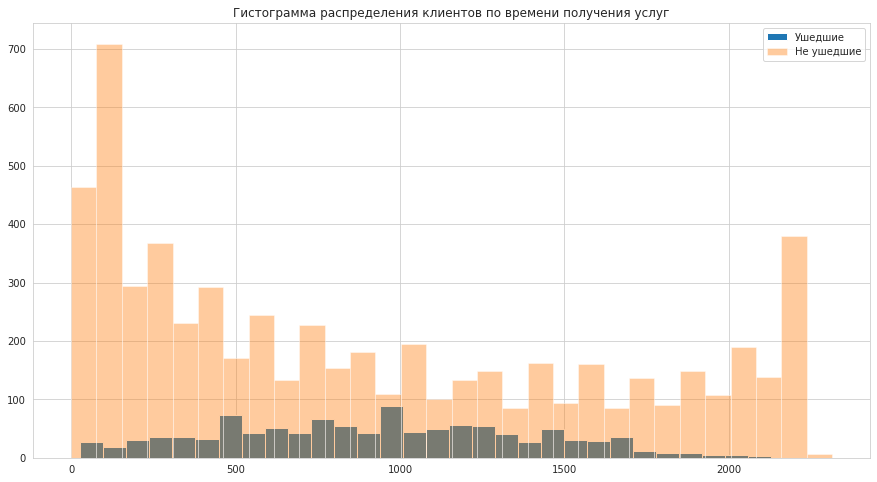

In [56]:
histogram('action_time', 'Гистограмма распределения клиентов по времени получения услуг')

Клиенты, который недавно начали пользоваться услугами, уходят реже, также снижается вероятность ухода, с длительностью использования больше 1700 дней.

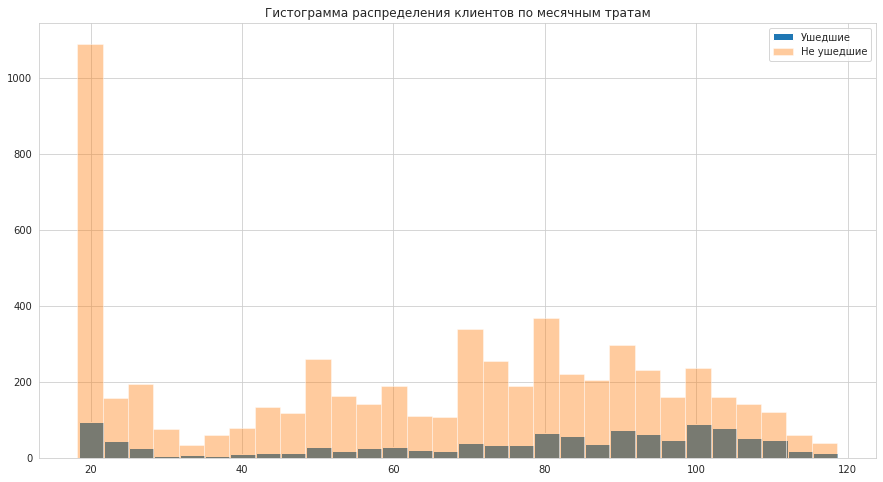

In [57]:
histogram('monthly_charges', 'Гистограмма распределения клиентов по месячным тратам')

Клиенты с месячными тратами меньше 30, реже уходят. Распределения в остальном диапазоне похожи.

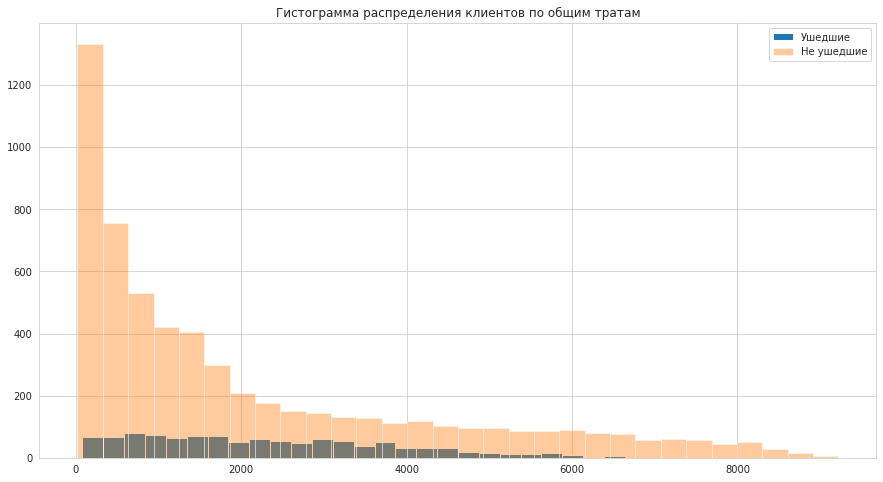

In [58]:
histogram('total_charges', 'Гистограмма распределения клиентов по общим тратам')

Клиенты с тратами меньше 2000 уходят реже. Также практически отсутсвуют ушедшие клиенты с тратами больше 7000.

<div class="alert alert-success">
<b>**Комментарий тимлида ✔️:**</b>

Есть исследование числовых признаков! Очень удачная визуализация, хорошо что изучаешь данные по когортам (ушел/остался).
</div>

Создаем новый призак "Количество используемых сервисов":

In [59]:
data['num_services'] = np.where(data['online_security'] == 'Yes', 1, 0) +\
                       np.where(data['online_backup'] == 'Yes', 1, 0) +\
                       np.where(data['device_protection'] == 'Yes', 1, 0) +\
                       np.where(data['tech_support'] == 'Yes', 1, 0) +\
                       np.where(data['streaming_tv'] == 'Yes', 1, 0) +\
                       np.where(data['streaming_movies'] == 'Yes', 1, 0) +\
                       np.where(data['multiple_lines'] == 'Yes', 1, 0)

<div class="alert alert-success">
<b>**Комментарий тимлида ✔️:**</b>

Отлично, создан новый синтетический признак!
</div>

Зависимость вероятности ухода клиента от количества используемых сервисов:

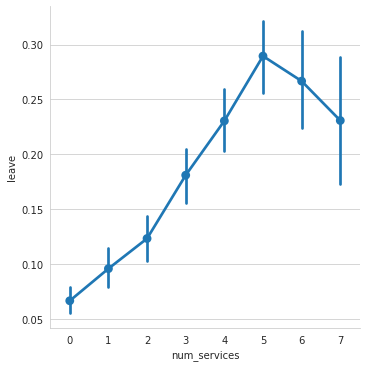

In [60]:
sns.catplot(data=data, x='num_services' , y='leave', kind='point')

<div class="alert alert-warning">
<b>**Комментарий тимлида ⚠️:**</b>

Важно на графиках приводить дополнительную информацию, добавляя понятные заголовки, подписи осей, так тебе и твоим коллегам будет проще читать визуализацию. Например, если соберёшься делать презентацию и выгрузишь все графики как картинки: меньше работы по их оформлению и проще идентифицировать, не надо при этом долго сверяться с тетрадью.
    
Этот материал может помочь освежить нюансы с оформлением - https://nagornyy.me/it/vizualizatsiia-dannykh-v-matplotlib/.
    
</div>

In [61]:
data['num_services'].value_counts()

0    1667
1    1158
3     978
2     957
4     933
5     722
6     420
7     208
Name: num_services, dtype: int64

Удалим признаки, не влияющие на обучение модели и построим корреляционную матрицу признаков:

In [62]:
data.drop(['customer_id', 'begin_date', 'end_date'], axis=1, inplace=True)

<div class="alert alert-success">
<b>**Комментарий тимлида ✔️:**</b>

Отлино что удаляешь неинформативные и спорные признаки - 'customerID','EndDate', 'BeginDate'. Касаемо дат - у нас бинарная классификация а не анализ временных рядов. Кроме этого даты могут дать серьезную утечку целевого признака (помогать предсказывать модели правильный ответ)
</div>

In [63]:
interval_cols = ['monthly_charges', 'total_charges', 'action_time']
phik_overview = data.phik_matrix(interval_cols=interval_cols)
phik_overview.round(2)

,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,action_time,phone,leave,num_services
type,1.00,0.11,0.28,0.39,0.47,0.00,0.09,0.18,0.15,0.51,...,0.10,0.14,0.18,0.07,0.07,0.07,0.63,0.00,0.09,0.46
paperless_billing,0.11,1.00,0.37,0.47,0.20,0.00,0.24,0.01,0.17,0.23,...,0.20,0.16,0.06,0.34,0.33,0.25,0.03,0.02,0.08,0.34
payment_method,0.28,0.37,1.00,0.40,0.34,0.00,0.29,0.24,0.22,0.32,...,0.28,0.31,0.27,0.38,0.38,0.34,0.35,0.00,0.21,0.46
monthly_charges,0.39,0.47,0.40,1.00,0.71,0.01,0.30,0.20,0.18,0.92,...,0.63,0.67,0.58,0.84,0.83,0.68,0.39,0.83,0.23,0.78
total_charges,0.47,0.20,0.34,0.71,1.00,0.00,0.14,0.38,0.08,0.49,...,0.62,0.64,0.55,0.64,0.64,0.57,0.85,0.16,0.30,0.62
gender,0.00,0.00,0.00,0.01,0.00,1.00,0.00,0.00,0.00,0.00,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00
senior_citizen,0.09,0.24,0.29,0.30,0.14,0.00,1.00,0.02,0.32,0.16,...,0.10,0.09,0.09,0.16,0.19,0.22,0.06,0.00,0.09,0.18
partner,0.18,0.01,0.24,0.20,0.38,0.00,0.02,1.00,0.65,0.00,...,0.22,0.24,0.19,0.19,0.18,0.22,0.45,0.02,0.23,0.30
dependents,0.15,0.17,0.22,0.18,0.08,0.00,0.32,0.65,1.00,0.11,...,0.03,0.01,0.10,0.02,0.06,0.03,0.20,0.00,0.05,0.12
internet_service,0.51,0.23,0.32,0.92,0.49,0.00,0.16,0.00,0.11,1.00,...,0.23,0.23,0.24,0.27,0.27,0.23,0.06,0.28,0.06,0.63


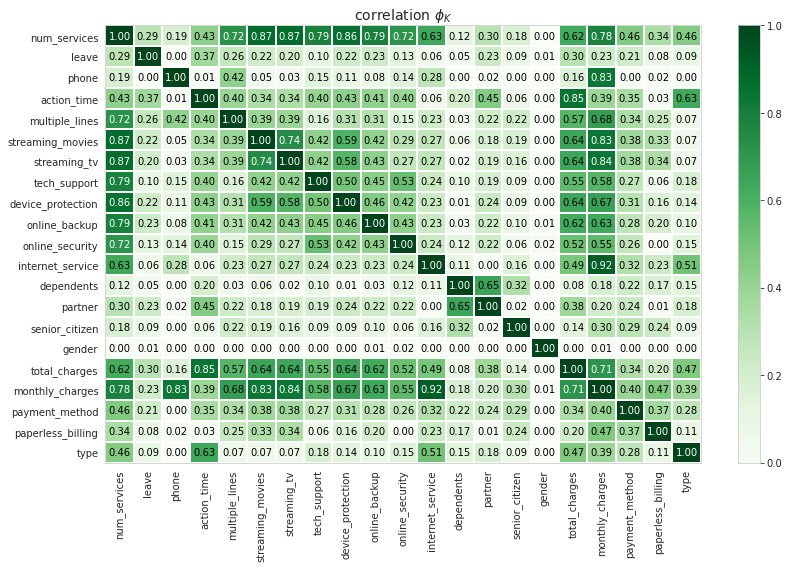

In [64]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1, 
                        figsize=(12, 8))
plt.tight_layout()

Утечка целевого признака не обнаружена. Видна высокая корреляция созданного признака с количеством используемых сервисов с признаком использования каждого сервиса, в дальнейшем будем использовать признак 'num_services'. Также наблюдается высокая корреляция следующих признаков:
 - num_services и monthly_charges
 - action_time и total_charges
 - partner и dependents

<div class="alert alert-success">
<b>**Комментарий тимлида ✔️:**</b>

Хорошо что проводишь проверку на мультиколлинеарность и влияние признаков на таргет.
    
Для этого можно использовать либо df.corr() предварительно ознакомившись с документацией (коэф Пирсона только для числовых). Лучше всего использовать библиотеку phik. Она работает как с категориальными так и с числовыми признаками. 

Напоминаю - два признака называются мультиколлинеарными, если они сильно коррелированы/зависимы. Изменения в одном признаке влекут за собой изменения в другом признаке. Мультиколлинеарность влияет на алгоритмы линейной регрессии, логистической регрессии, KNN и Наивного Байеса. В случае использования этих моделей нужно избавляться от мультиколлинеарности (удалять один из признаков).
    
----

Но нужно помнить, что мультиколлинеарность влияет на работу линейных моделей, при условии, что в них НЕ ИСПОЛЬЗУЮТСЯ механизмы регуляризации. Однако, даже для тех моделей, в которых мультиколлинеарность не играет большой роли в случае сильной коллинеарности признаков, один из признаков возможно не несет дополнительной информации для построения модели, в связи с чем может быть бесполезен при использовании. Так же на этапе проверки мультиколлинеарности ты проверяшь на наличие утечки или прокси признака к таргету.

</div>

Выбираем признаки для обучения: gender и phone не влияют на целевой признак; у partner и dependents высокая корреляция, а dependents почти не влияет на целевой признак, признаки с разными услугами сильно коррелируют с созданным признаком num_services, а значит будут ухудшать обучение моделей:

In [65]:
data_n = data.drop(['gender',
           'dependents',
           'internet_service',
           'online_security',
           'online_backup',
           'device_protection',
           'tech_support',
           'streaming_tv',
           'streaming_movies',
           'multiple_lines',
           'phone'
          ], axis=1)

<div class="alert alert-warning">
<b>**Комментарий тимлида ⚠️:**</b>

Из исследования выше непонятно, почему ты удаляешь эти признаки перед обучением модели. Пожалуйста дай комментарий, объясняющий причину данного действия.
</div>

### Подготовка данных к обучению

В признаке type объединяем группы 'One year' и 'Two year', так как статистически значимых различий между ними нет:

In [66]:
results = st.ttest_ind(
    data_n.query('type == "One year"')['leave'], 
    data_n.query('type == "Two year"')['leave'],
    equal_var = False
)
print('p-значение:', results.pvalue) 

p-значение: 0.40378946039671126


<div class="alert alert-warning">
<b>**Комментарий тимлида ⚠️:**</b>

Для такого заключения нужно выполнить проверку гипотез на статистическую значимость...
</div>

In [67]:
data_n['type'].replace(['One year', 'Two year'], value='Year', inplace=True)

In [68]:
data_n['type'].value_counts()

Month-to-month    3875
Year              3168
Name: type, dtype: int64

В признаке payment_method объединяем группы 'Bank transfer (automatic)' и 'Credit card (automatic)', так как статистически значимых различий между ними нет:

In [69]:
results = st.ttest_ind(
    data_n.query('payment_method == "Bank transfer (automatic)"')['leave'], 
    data_n.query('payment_method == "Credit card (automatic)"')['leave'],
    equal_var = False
)
print('p-значение:', results.pvalue) 

p-значение: 0.8393094459431204


<div class="alert alert-success">
<b>**Комментарий тимлида_v2 ✔️:**</b>

Проверка гипотез на статистическую значимость. Отлично, что применяешь этот инструмент в своей работе. Предположу, что основы статистики и теории вероятностей тобой усвоены хорошо! Данный подход (проверка гипотез) очень часть используют в реальной работе аналитики (например А/B-тестирование).
</div>

In [70]:
data_n['payment_method'].replace([
   'Bank transfer (automatic)', 
   'Credit card (automatic)'
], value='automatic', inplace=True)

In [71]:
data_n['payment_method'].value_counts()

automatic           3066
Electronic check    2365
Mailed check        1612
Name: payment_method, dtype: int64

Создаем новый категориальный признак со сроком действия договора:

In [72]:
data_n['period'] = np.where(data_n['action_time'] < 500, '<500', 0)

In [73]:
data_n['period'] = np.where(data_n['action_time'] > 1700, '>1700', data_n['period'])

In [74]:
data_n['period'] = np.where(data_n['period'] == '0', '500-1500', data_n['period'])

In [75]:
data_n['period'].value_counts()

500-1500    3131
<500        2667
>1700       1245
Name: period, dtype: int64

In [76]:
data_n['num_services'] = np.where(data_n['num_services'] > 5, 5, data_n['num_services'])

Отделяем тестовую выборку:

<div class="alert alert-warning">
<b>**Комментарий тимлида :**</b>

1. Не проведен анализ на дисбаланс целевого класса. Это важный этап в работе, при наличии дисбаланса есть несколько вариантов:
   
- ничего не делать тк  ROC-AUC невчуствительна к дисбалансу.
- применить сэмплирование
- воспользоваться встренными средствами балансировки в моделях (class_weight)
    
Если планируешь выполнять апсэмплинг попробуй изучить другие методы балансировки классов, в sklearn их много, плюс есть спец библиотеки в которых реализованы интересные подходы по балансировке. Вот неплохая статья по этой теме https://towardsdatascience.com/how-to-deal-with-imbalanced-data-in-python-f9b71aba53eb
    
    
2. При разбиении на выборки при наличии дисбаланса необходимо применять стратификацию (параметр stratify)

3. В нашей работе рекомендуется test_size = 0.25
</div>

In [77]:
data_train, data_test = train_test_split(
    data_n,
    test_size=0.25, 
    random_state=100523, 
    stratify=data_n['leave']
)

<div class="alert alert-success">
<b>**Комментарий тимлида ✔️:**</b>

Круто что используешь стратификацию при разбиении на выборки. Это позволит сохранить первоначальный дисбаланс целевого признака в выборках. 
</div>

In [78]:
features_train = data_train.drop('leave', axis=1)
target_train = data_train['leave']
features_test = data_test.drop('leave', axis=1)
target_test = data_test['leave']

Проверяем баланс классов:

In [79]:
target_train.value_counts()

0    4456
1     826
Name: leave, dtype: int64

Классы не сбалансированы. Применим метод SMOTE для балансировки классов.

### Логистическая регрессия

Выделяем признаки для дальнейшей кодировки:

In [80]:
ohe_features = features_train.dtypes[features_train.dtypes == object].index

In [81]:
num_features = features_train.dtypes[features_train.dtypes != object].index
num_features = ['monthly_charges', 'total_charges', 'action_time', 'num_services']

Создаем функцию кодировки признаков:

In [82]:
col_transformer_lr = make_column_transformer(
    (
        OneHotEncoder(drop='first', handle_unknown='ignore'),
        ohe_features
    ),
    (
        StandardScaler(), 
        num_features
    ),
    remainder='passthrough'
)

<div class="alert alert-success">
<b>**Комментарий тимлида ✔️:**</b>

Круто что используешь make_column_transformer  и пайплайны! Очень мало кто применяет эту технику в своей работе! 

</div>

<div class="alert alert-success">
<b>**Комментарий тимлида :**</b>

1. Кодирование необходимо для большинства моделей. OHE или OrdinalEncoder вполне допустимый вариант. Молодец что проводишь кодированик ПОСЛЕ разбиения на трейн-тест. Как и с масштабированием - обучаем на трейне, преобразовываем как на трейне так и на тесте. Мы не знаем какие данные могут быть в тесте (по факту тест нам как бы недоступен), по этому не должны допускать утечку инфомрации из теста. 
    
2. Очень хорошо, что используешь промышленный подход - OНE. Не рекомендуется использовать get_dummies(). Если все-таки ты планируешь использовать get_dummies() - нужно после кодирования трейн и тест выполнить проверку не поменялись ли местами колонки в датасетах? Правильно ли выполнено кодирование?
    
3. Многие модели градиентного бустинга умеют работать с незакодированными категориальными столбцами. В этом случае кодирование можно не выполнять.
   
4. Оптимальный способ кодирования зависит от модели - для линейных моделей хорошо подходит OHE, для деревьев и их производных - OE.
</div>

Найдем с помощью кросс-валидации лучшие гиперпараметры модели логистической регрессии по метрике ROC-AUC:

In [83]:
model_lr = LogisticRegression(random_state=100523)

In [84]:
pipeline_lr = imbpipeline(steps = [
                     ['col_transformer', col_transformer_lr],
                     ['smote', SMOTE(random_state=100523)],
                     ['logisticregression', model_lr]])

In [85]:
pipeline_lr

Pipeline(steps=[['col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['type', 'paperless_billing', 'payment_method', 'partner', 'period'], dtype='object')),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['monthly_charges',
                                                   'total_charges',
                                                   'action_time',
                                                   'num_services'])])],
                ['smote', SMOTE(random_state=100523)],
                ['logisticregression',
                 LogisticRegression(random_state=100523)]])

In [86]:
parameters_lr = {'logisticregression__solver': ['lbfgs', 'liblinear', 'saga'],
               'logisticregression__C':[0.01, 0.1, 1, 10, 100],
               'logisticregression__penalty':['elasticnet', 'l1', 'l2'],
               'smote__k_neighbors': range(5, 20)
              }

In [87]:
grid_search_lr = GridSearchCV(
    pipeline_lr, 
    param_grid=parameters_lr, 
    scoring='roc_auc', 
    n_jobs=-1
)
grid_search_lr.fit(features_train, target_train)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1500 fits failed out of a total of 3375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
375 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/imblearn/pipeline.py", line 297, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual

GridSearchCV(estimator=Pipeline(steps=[['col_transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         Index(['type', 'paperless_billing', 'payment_method', 'partner', 'period'], dtype='object')),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         ['monthly_charges',
                                                                          'total_charges',
                                                                          'action_t...
                                                                          'num_services'])])],
                                       ['smote', SMOTE(random_state=100523)],
                                       ['logisticregression',
                                        LogisticRegression(random_state=100523)]]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.01, 0.1, 1, 10, 100],
                         'logisticregression__penalty': ['elasticnet', 'l1',
                                                         'l2'],
                         'logisticregression__solver': ['lbfgs', 'liblinear',
                                                        'saga'],
                         'smote__k_neighbors': range(5, 20)},
             scoring='roc_auc')

In [88]:
lr_best_score = grid_search_lr.best_score_
lr_best_params = grid_search_lr.best_params_

Лучшая оценка:

In [89]:
lr_best_score

0.8095464936378584

Лучшие гиперпараметры:

In [90]:
lr_best_params

{'logisticregression__C': 0.1,
 'logisticregression__penalty': 'l1',
 'logisticregression__solver': 'saga',
 'smote__k_neighbors': 15}

Коэффициенты логистической регрессии:

In [91]:
pd.DataFrame(
    grid_search_lr.best_estimator_[2].coef_.ravel(),
    grid_search_lr.best_estimator_[0].get_feature_names_out().ravel(),
    columns=['coef']
).sort_values('coef', ascending=False)

,coef
onehotencoder__type_Year,1.284885
onehotencoder__partner_Yes,0.770257
standardscaler__num_services,0.637047
remainder__senior_citizen,0.414594
standardscaler__monthly_charges,0.397933
onehotencoder__payment_method_automatic,0.174323
onehotencoder__paperless_billing_Yes,0.066007
standardscaler__action_time,0.000000
onehotencoder__payment_method_Mailed check,-0.486161
standardscaler__total_charges,-0.747653


<div class="alert alert-success">
<b>**Комментарий тимлида ✔️:**</b>

Очень хорошо, что выполняешь такую плотную работу по отбору признаков. Но это лучше делать с выбранной лучшей моделью в конце исследования.
</div>

<div class="alert alert-danger">
<b>**Комментарий тимлида ❌:**</b>

На сколько я помню - эта функция тянется из работы в работу на протяжении всего курса. Зачем заставлять других разработчиков изучать твой вариант сэмплирования, когда есть много других оббщепринятых и общеизвестных. Если планируешь выполнять апсэмплинг попробуй изучить другие методы балансировки классов, в sklearn их много, плюс есть спец библиотеки в которых реализованы интересные подходы по балансировке. Вот неплохая статья по этой теме https://towardsdatascience.com/how-to-deal-with-imbalanced-data-in-python-f9b71aba53eb

При использовании функции Upsample() ты по сути просто увеличиваешь датасет, добавляя дублирующие значения в выборки. При получается что при кроссвалидации у тебя скорей всего возникает ситуация, когда данные находятся КАК в обучающих фолдах, так и в тестовых. Следовательно из-за дубликатов, которые делаются в этой функции, появляются утечки на кросс-валидации и метрика недостоверна модели на кроссвалидации неверная. Нужно использовать подходы, о которых я написал выше. Либо отказаться от этого способа сэмплирования.
</div>

<div class="alert alert-success">
<b>**Комментарий тимлида ✔️:**</b>

Если делать балансировку с применением кроссалидации -- то только с использованием SMOTE или подобных подходов. 
</div>

### Random Forest

<div class="alert alert-warning">
<b>**Комментарий тимлида ⚠️:**</b>

Нет необходимости заново разбивать датасет. Достаточно один раз подготовить исходные варианты трейн-тест выборок и использвоать их в моделях.
</div>

Отделяем целевой признак:

Категориальные признаки для кодировки:

In [86]:
ohe_features = features_train.dtypes[features_train.dtypes == object].index

Функция кодировки признаков:

In [87]:
col_transformer_rf = make_column_transformer(
    (
        OrdinalEncoder(handle_unknown='ignore'),
        ohe_features
    ),
    remainder='passthrough'
)

Ищем лучшие гиперпараметры с помощью кросс-валидации:

In [88]:
model_rf = RandomForestClassifier(random_state=100523)

<div class="alert alert-danger">
<b>**Комментарий тимлида ❌:**</b>

Про сэмплирование функцией Upscale() замечание выше.
</div>

<div class="alert alert-warning">
<b>**Комментарий тимлида ⚠️:**</b>

именно по этому такая высокая метрика получилась изза ошибки с сэмплированием.
</div>

In [89]:
pipeline_rf = imbpipeline(steps = [['col_transformer', col_transformer_lr],
                                   ['smote', SMOTE(random_state=100523)],
                                   ['randomforestclassifier', model_rf]])

In [90]:
param_grid_rf = {
    'randomforestclassifier__n_estimators': range(10, 100, 10),
    'randomforestclassifier__max_depth': range(2, 15),
    'randomforestclassifier__min_samples_split': (3, 4, 5, 6),
    'randomforestclassifier__min_samples_leaf': (1, 2, 3, 4),
    'randomforestclassifier__max_features': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10),
    'smote__k_neighbors': range(5, 20)
}

Лучшая оценка модели и ее гиперпараметры:

In [91]:
gs_rf = RandomizedSearchCV(
    pipeline_rf, 
    param_distributions=param_grid_rf, 
    scoring='roc_auc',
    n_jobs=-1, 
    random_state=100523
)

gs_rf.fit(features_train, target_train)

gs_rf_best_score = gs_rf.best_score_
gs_rf_best_params = gs_rf.best_params_
print(f'best_score: {gs_rf_best_score}')
print(f'best_params: {gs_rf_best_params}')

best_score: 0.8202175678813143
best_params: {'smote__k_neighbors': 6, 'randomforestclassifier__n_estimators': 70, 'randomforestclassifier__min_samples_split': 4, 'randomforestclassifier__min_samples_leaf': 4, 'randomforestclassifier__max_features': 5, 'randomforestclassifier__max_depth': 8}


In [92]:
best_model = gs_rf.best_estimator_

In [93]:
pd.DataFrame(
    best_model[2].feature_importances_.ravel(),
    gs_rf.best_estimator_[0].get_feature_names_out().ravel(),
    columns=['importance']
).sort_values('importance', ascending=False)

,importance
standardscaler__num_services,0.254714
standardscaler__action_time,0.213339
standardscaler__total_charges,0.120349
onehotencoder__period_>1700,0.095622
onehotencoder__type_Year,0.093134
onehotencoder__partner_Yes,0.081202
standardscaler__monthly_charges,0.070484
onehotencoder__payment_method_Mailed check,0.023170
remainder__senior_citizen,0.016032
onehotencoder__payment_method_automatic,0.014502


In [94]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5282 entries, 1406 to 1519
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               5282 non-null   object 
 1   paperless_billing  5282 non-null   object 
 2   payment_method     5282 non-null   object 
 3   monthly_charges    5282 non-null   float64
 4   total_charges      5282 non-null   float64
 5   senior_citizen     5282 non-null   int64  
 6   partner            5282 non-null   object 
 7   action_time        5282 non-null   int64  
 8   num_services       5282 non-null   int64  
 9   period             5282 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 453.9+ KB


In [95]:
features_train_1 = features_train[['num_services', 'action_time']]

<div class="alert alert-warning">
<b>**Комментарий тимлида_v2 ⚠️:**</b>

Сомнительное решение -- оставить только 2 признака для прогнозирования. В случае изменения паттерна поведения пользователей модель потеряет обобщающую возможность и метрика станет значительно хуже. Если оставить больше признаков -- вероятно модель будет опираться на более широкий набор признаков, и метрика не так сильно просядет. Так же я бы рекомендовал попробовать модели с градиентным бустингом.
</div>

In [96]:
pipeline_rf = imbpipeline(steps = [['smote', SMOTE(random_state=100523)],
                                   ['randomforestclassifier', model_rf]])

In [97]:
gs_rf = RandomizedSearchCV(
    pipeline_rf, 
    param_distributions=param_grid_rf, 
    scoring='roc_auc',
    n_jobs=-1, 
    random_state=100523
)

gs_rf.fit(features_train_1, target_train)

gs_rf_1_best_score = gs_rf.best_score_
gs_rf_1_best_params = gs_rf.best_params_
print(f'best_score: {gs_rf_best_score}')
print(f'best_params: {gs_rf_best_params}')

best_score: 0.8202175678813143
best_params: {'smote__k_neighbors': 6, 'randomforestclassifier__n_estimators': 70, 'randomforestclassifier__min_samples_split': 4, 'randomforestclassifier__min_samples_leaf': 4, 'randomforestclassifier__max_features': 5, 'randomforestclassifier__max_depth': 8}


Добились желаемого результата по метрике AUC-ROC.

In [98]:
best_estimator = gs_rf.best_estimator_

In [99]:
feature_importances = pd.DataFrame(
    best_estimator[1].feature_importances_.ravel(),
    best_estimator[0].get_feature_names_out().ravel(),
    columns=['importance']
).sort_values('importance', ascending=False)
feature_importances

,importance
action_time,0.840677
num_services,0.159323


График важности признаков:

<AxesSubplot:title={'center':'Важность признаков'}>

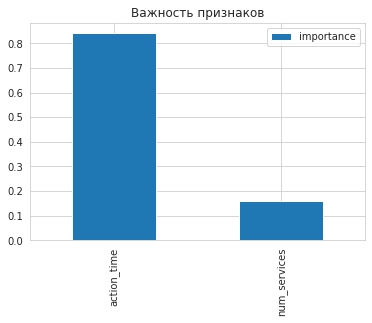

In [100]:
feature_importances.plot(kind='bar', title='Важность признаков')

<div class="alert alert-success">
<b>**Комментарий тимлида_v2 ✔️:**</b>

Супер, хорошо что есть важность признаков итоговой модели! Это обычно позволяет понять, какие признаки наиболее сильно влияют на результат, а какие - не влияют вовсе. Наименее значимые признаки можно даже попробовать исключить из датасета и заново переобучить модель.

Атрибут features_importance_ есть практически во всех моделях (в линейной регрессии его нет, там есть coef_),  он отражает степень важности признаков для модели. Есть даже специализированная библиотека https://shap.readthedocs.io/en/latest/index.html которая позволяет анализировать важность признаков для моделей, даже у тех моделей, у которых нет соответствующего атрибута важности.

</div>

<div class="alert alert-warning">
<b>**Комментарий тимлида ⚠️:**</b>

Отлично, есть исследование моделей, получены метрики на кроссвалидации. Не хватает сводной таблицы, по ней будет удобно определить лучшую модель.
</div>

Протестируем модель и найдем метрики AUC-ROC и accuracy лучшей модели, построим ROC-кривую и матрицу ошибок:

In [101]:
features_test = features_test[['num_services', 'action_time']]

In [102]:
prob_one = best_estimator.predict_proba(features_test)[:, 1]

In [103]:
predicted = best_estimator.predict(features_test)

In [104]:
roc_auc_best = roc_auc_score(target_test, prob_one)
roc_auc_best

0.8950128471797381

In [105]:
accuracy_best = accuracy_score(target_test, predicted)
accuracy_best

0.7978421351504826

<div class="alert alert-success">
<b>**Комментарий тимлида_v2 ✔️:**</b>

Вот и наша итоговая метрика! 
</div>

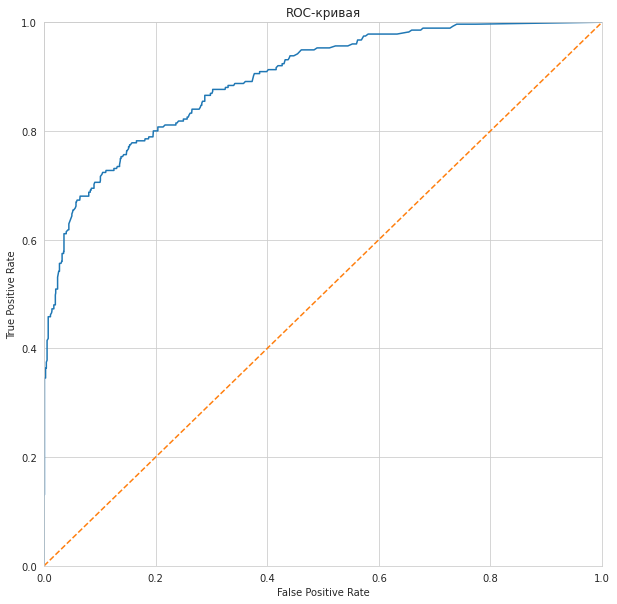

In [106]:
fpr, tpr, thresholds = roc_curve(target_test, prob_one)
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

<div class="alert alert-danger">
<b>**Комментарий тимлида ❌:**</b>

Неверно считаешь roc_auc_score(). Посмотри документацию, там подробно расписан случай расчета метрики для бинарной классификации. В качестве предсказания нужно подавать ВЕРОЯТНОСТЬ старшего класа.
</div>

<div class="alert alert-danger">
<b>**Комментарий тимлида ❌:**</b>

Цель данного этапа не достигнута - на тестовых данных модель должна показать результат ROC-AUC >0.85 

</div>

Матрица ошибок:

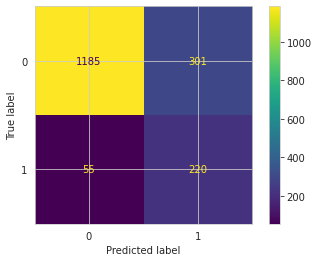

In [107]:
cm = confusion_matrix(target_test, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Модель хорошо определяет факт не ухода клиентов и хуже их вероятный уход.

<div class="alert alert-danger">
<b>**Комментарий тимлида ❌:**</b>

Код падает с ошибкой. Пожалуйста поправь.
</div>

<div class="alert alert-success">
<b>**Комментарий тимлида ✔️:**</b>

Отлично, есть матрица ошибок и ее анализ! Она нужна, т.к. с точки зрения метрики - да, все ок, нужный показатель достигнут. Но вот с точки зрения бизнеса - ROC_AUC плохо интерпретируется. Гораздо лучше отразить дополнительно к этому графику еще и матрицу ошибок - confusion matrix. На основе нее сделать выводы как часто может ошибаться, какой тип ошибки наиболее вероятен и к чему с тз бизнеса это может привести.

</div>

<div class="alert alert-danger">
<b>**Комментарий тимлида ❌:**</b>

Не хватает анализа важности признаков итоговой модели. В ходе исследования ты уже делал его, но лучше всего сделать это на этом этапе.Нужно построить график (barplot) отсортированных по важности признаков и сделать по ним свои выводы.
</div>

<div class="alert alert-danger">
<b>**Комментарий тимлида ❌:**</b>

Хорошая работа, но видно, что и исследователь несколько торопился с ее выполнением. Многое сделано очень качественно - разведочный анализ и выводы по нему. А вот с моделированием есть сложности - значение целевой метрики на тестовой выборке не достигнуто. Пожалуйста отработай мои ошибки и высылай работу на проверку.
</div>

<div class="alert alert-success">
<b>**Комментарий тимлида [КОД ФИНАЛЬНЫЙ] ✔️:**</b>

Евгений, получилось хорошее и качественное исследование!
    
Обработка данных, размышления над признаками, поиск и сравнение различных вариантов обучающего датасета. Конечные результаты, графика - многое удалось как надо. Можно сказать, что пройден весь алгоритм моделирования от анализа исходной инфо до анализа важности факторов.
А что совсем хорошо, так это то, что нет гонки за точностью любой ценой, даже ценой наружения бизнес-логики. (это я про даты-признаки - всегда есть соблазн их оставить...)
    
Прежде, чем пойти дальше хочу обратить особое внимание на следующие пункты:
    
1. F1, Accuracy и AUC - отличные метрики, но нужно держать в голове, что это лишь обобщённые характеристики. А в реальной практике бизнесу часто важно знать детали самой ошибки - из каких ошибок/успехов она складывается. И в этом случае очень кстати будут меры полноты и точности. Рассмотри возможность их использования для своих проектов. Только через них можно выйти на финансовые возможности модели. Ведь перед запуском её в бой, будет сравнение стоимости создания и поддержки модели со стомостью "оставить как есть".


2. При анализе факторов влияния (их зависиомть между собой и на целевую) происходит по одному из трёх алгоритмов, исходя из типа шкалы. Могут применять следующие графический и аналитический анализы:

- колличественная-колличественная: аналитически метод - корреляции, графический - скатерплот.
- колличественная-номинальная: аналитически методод - проверка гипотез (стьюдент), графический - боксплот.
- номинальная-номинальная: аналитически методод - Хи-квадрат, графический - круговая диаграмма
Это я к тому разделу, который посвящён анализу данных. Там сделаны интересные предположения и их аналитическая проверка. Очень важные этапы любого исследования, где требуется определить валидность использования признаков из датасета.
    
3. Алгоритм нахождения модели может быть таким:

- изучаем проблематику бизнеса и самой темы (в данном случае отток). Пытаемся понять суть явления.
- генерируем разные факторы влияния - любые.
- дизайнируем (прикидываем модели) какие методы решения есть, чтобы решить проблему.
- Смотрим, какие данные и в какой шкале есть. Что нужно ещё, что применить выбранный метод.
- Оцениваем мультиколлинеарность.
- Готовим подходящий датасет (масштабируем, убираем лишние признаки, кодируем)
- Строим модели и анализируем те фактры, какие сгенерировали ранее.
- Думаем над тем, какие причины (факторы) могут ещё влиять на таргет.
- Если после нескольких итераций точность "замирает" - значит достигли потолка)
    
4. Проведение анализа важности факторов с помощью команды feature_importances_ (+графический анализ). Отличная вещь намечается: высокая метрика + график рейтинаг факторов по силе влияния на целевой признак). Важнейшая часть любого модельного финала. Если видно, что часть факторов - слабозначимые для модели. Т.е. не значительно влияют на целевую переменную, то их смело можно убирать из модели. Ну и для бизнеса доносить: на эти факторы надо обращать внимание, а эти не влияют на уход клиента.

5. Нужно так же помнить, что возможно твоя задача уже была решена кем-то до тебя. По этому перед каждым исследованием рекомендуется провести анализ имеющихся материалов и методов, которые связаны с темой твоего проекта. Вполне возможно тебе не нужно будет начинать все с нуля, а воспользоваться уже существующими подходами и\или наработками. Вот ссылка на хорошую статью - https://habr.com/ru/post/664102/ (правда там есть ошибка с масштабированием, но я уверен ты ее найдешь).


Вопросов у меня больше нет, работу принимаю, твоя метрика ROC-AUC = 0.89 что соответствует выполнению данного этапа. 

Не забудь перед подготовкой отчета еще раз прочитать мои рекомендации по его составлению (что проверяется и на что обращается внимание при проверке).
    
</div>

<div class="alert alert-success">
   
----
<div align="center"> <b>=====    Новый этап работы - "Подготовка отчета". Нумерация комментариев с этого момента начинается ЗАНОВО    =====</b></div>

----
    
</div>

## Отчёт по решению

### Описание задачи

Оператор связи «Ниединогоразрыва.ком» предоставляет два основных типа услуг: стационарную телефонную связь и подключение к Интернету. Необходимо построить модель для предсказания ухода клиентов от оператора, с целью предложения потенциально планирующим отказ от услуг клиентам промокодов и специальных условий.

Данные о клиентах состоят из файлов, полученных из разных источников:

 - contract_new.csv — информация о договоре;
 - personal_new.csv — персональные данные клиента;
 - internet_new.csv — информация об интернет-услугах;
 - phone_new.csv — информация об услугах телефонии.
 
**Цель задачи:** Анализируя предоставленную информацию, спрогнозировать отток клиентов, используя методы машинного обучения, с помощью обучения различных моделей машинного обучения, добиться метрики AUC-ROC модели не менее 0,85.

**План:**
 - Объединить таблицы и глубже проанализировать сводные данные
 - Подготовить данные для обучения разных моделей
 - Обучить и выбрать лучшую модель по метрике ROC-AUC
 - Протестировать выбранную модель

### Решение

В ходе решения была проанализирована сводная таблица с данными о клиентах.
Сформированы следующие синтетические признаки:
 - Срок пользования услугами в днях
 - Использование телефонной связи
 - Количество используемых услуг
 
Получен целевой признак: факт ухода клиента.

Графики зависимости вероятности ухода клиента от различных признаков:

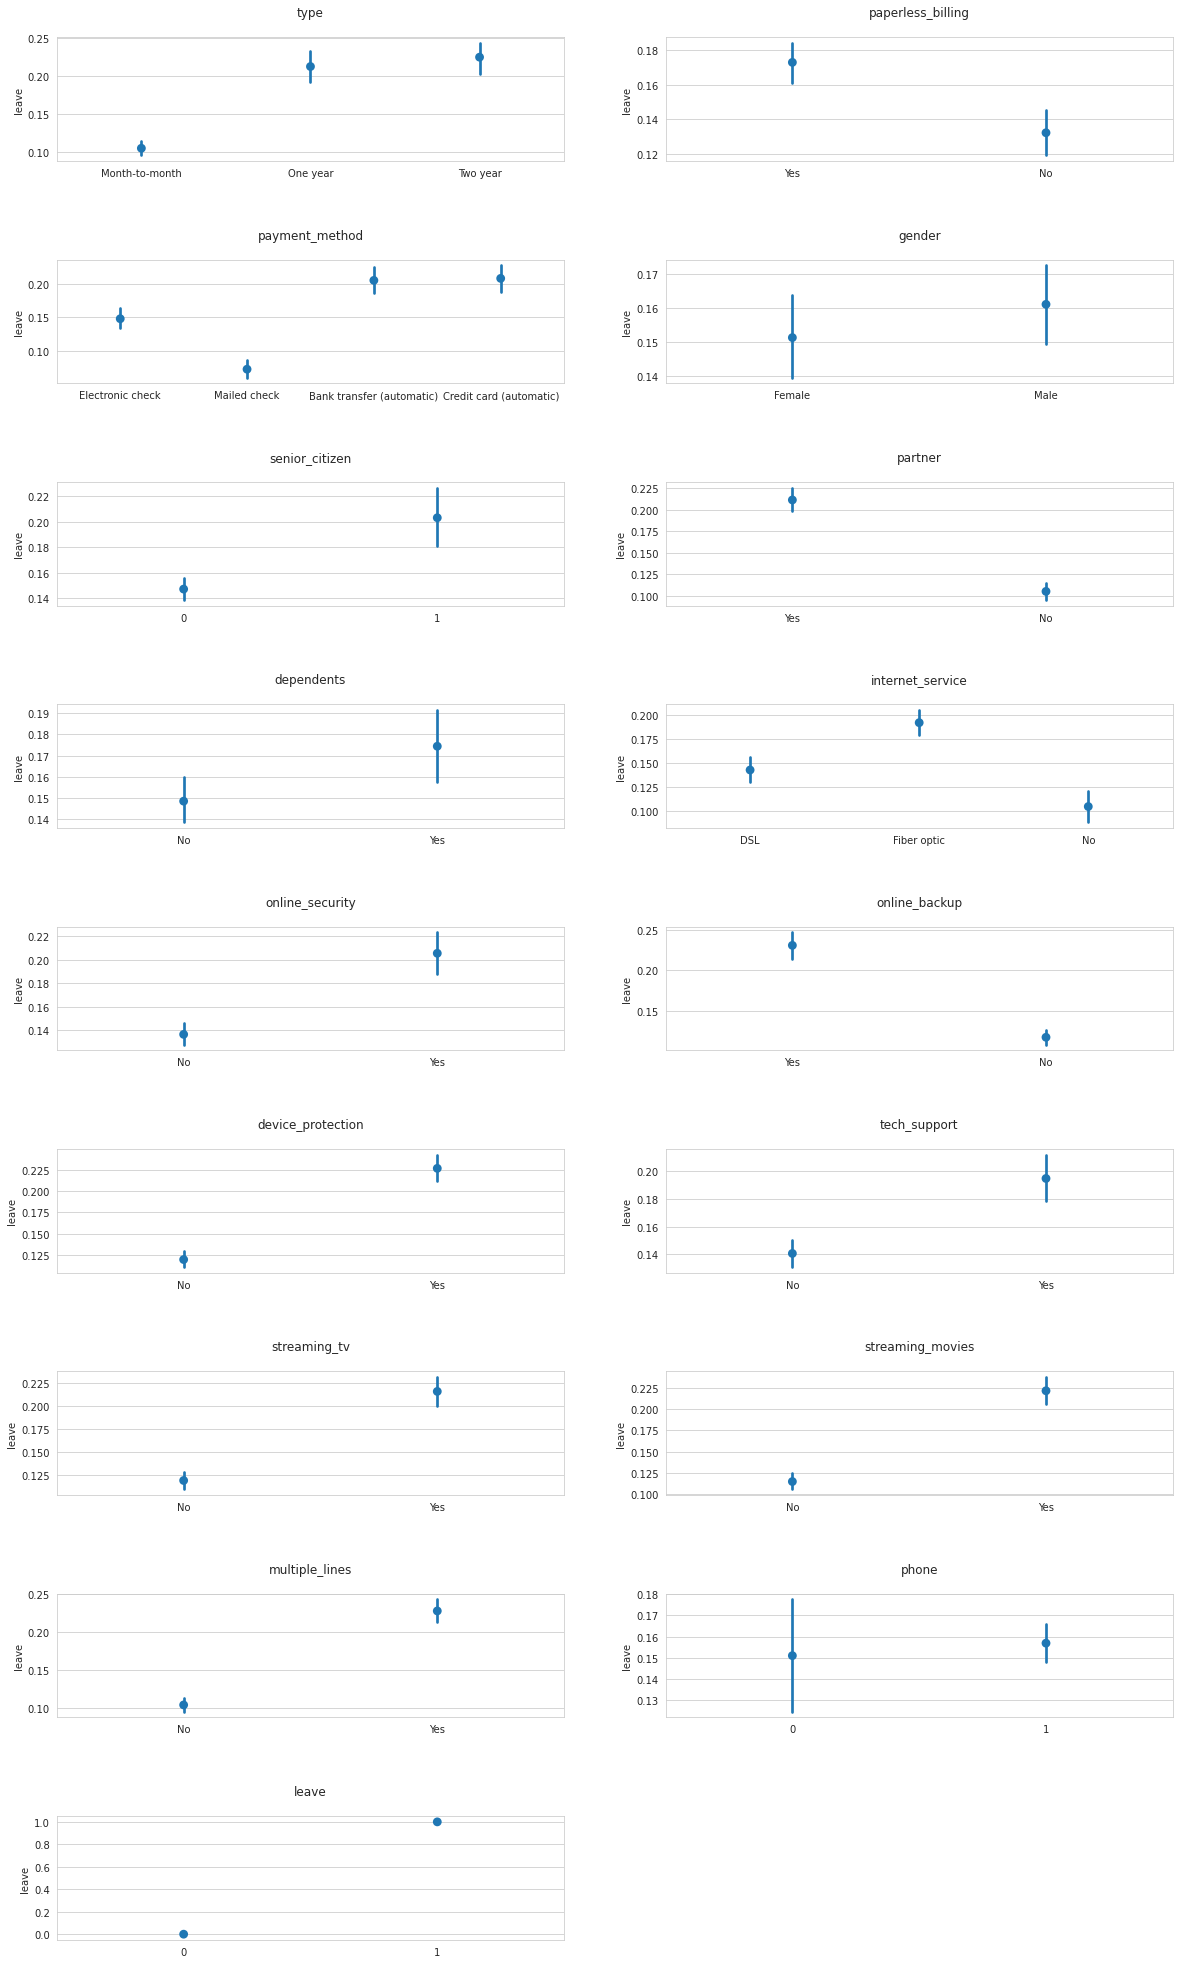

In [108]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 35))
plt.subplots_adjust(wspace = 0.2, hspace = 0.8)
j = 0
for i in data.nunique()[data.nunique() < 5].index:
    plt.subplot(9, 2, j+1)
    g = sns.pointplot(data=data, x=i , y='leave', join=False)
    g.set(xlabel=None, title=i+'\n', )
    j += 1

По графикам можно определить портрет уходящего клиента:

- имеют долгосрочные договоры (на один или два года)
- получают бумажные чеки
- оплачивают услуги с помощью автоматических списаний
- являются пенсионерами
- состоят в браке
- имеют детей
- пользуются подключением к интернету
- пользуются какой-либо из дополнительных услуг

Была построена корреляционная матрица признаков:

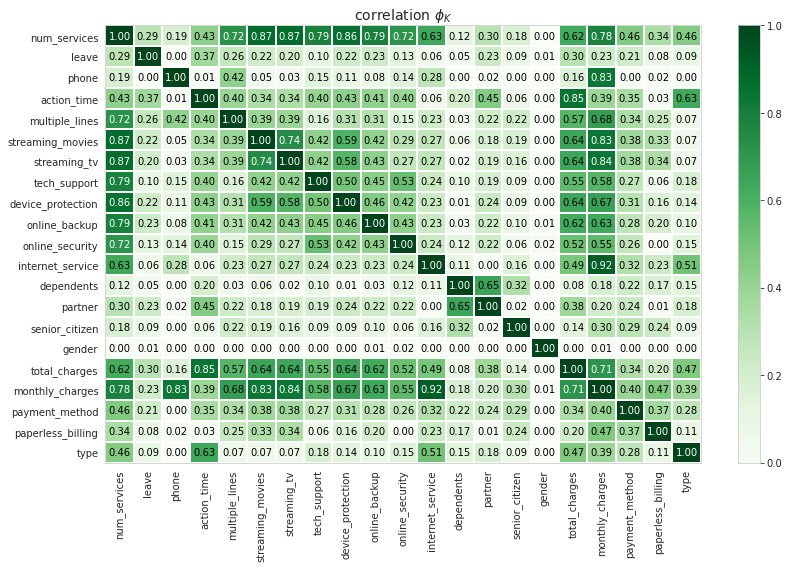

In [109]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1, 
                        figsize=(12, 8))
plt.tight_layout()

В ходе анализа корреляционной матрицы найдены признаки, сильнее других влияющие на целевой, а также найдены зависимые друг от друга признаки. Сильно коррелирующие между собой признаки и признаки не влияющие на уход убираем для лучшей работы моделей.

В дальнейшем, используются следующие признаки:

In [110]:
for i in range(len(data_n.columns)):
    print(data_n.columns[i])

type
paperless_billing
payment_method
monthly_charges
total_charges
senior_citizen
partner
action_time
leave
num_services
period


Были обучены модели логистической регрессии и случайного леса. На кросс-валидации получены лучшие гиперпараметры моделей и лучшие оценки AUC-ROC:

In [111]:
pd.DataFrame([lr_best_score, gs_rf_best_score], ['Логистическая регрессия', 'Случайный лес'], columns=['AUC-ROC'])

NameError: name 'lr_best_score' is not defined

Для модели случайного леса была изучена важность признаков:

<AxesSubplot:title={'center':'Важность признаков'}>

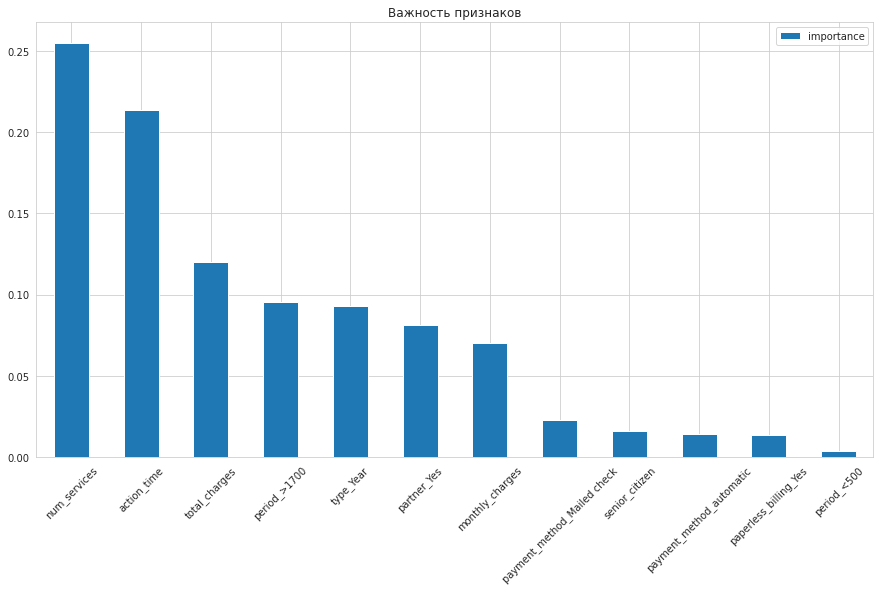

In [113]:
pd.DataFrame(
    best_model[2].feature_importances_.ravel(),
    [re.sub(r'^.*?__', '', i) for i in best_model[0].get_feature_names_out().ravel()],
    columns=['importance']
).sort_values('importance', ascending=False).plot(kind='bar', figsize=(15,8), rot=45, title='Важность признаков')

Для улучшения качества работы модели были удалены наименее значимые признаки, при этом лучший результат показала модель с применением двух признаков: `num_services` и `action_time`.

<div class="alert alert-danger">
<b>**Комментарий тимлида_v2 ❌:**</b>

Код падает с ошибкой. Не могу проверить работу. Пожалуйста поправь и высылай на финальную проверку.
</div>

Гиперпараметры модели:

In [114]:
gs_rf_1_best_params

{'smote__k_neighbors': 13,
 'randomforestclassifier__n_estimators': 60,
 'randomforestclassifier__min_samples_split': 5,
 'randomforestclassifier__min_samples_leaf': 2,
 'randomforestclassifier__max_features': 9,
 'randomforestclassifier__max_depth': 13}

In [115]:
gs_rf_1_best_score

0.8726672746247036

Модель была протестирована и показала следующие результаты:

Метрика AUC-ROC:

In [116]:
roc_auc_best

0.8950128471797381

Для лучшего понимания результата была найдена метрика Accuracy и построена матрица ошибок:

In [117]:
accuracy_best

0.7978421351504826

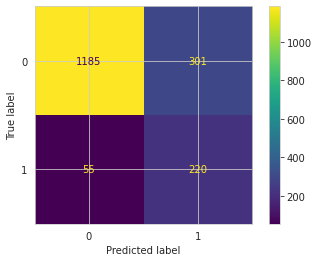

In [118]:
cm = confusion_matrix(target_test, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

По матрице ошибок видно, что модель хорошо определяет клиентов, которые останутся, и хуже тех, которые уйдут. Для поставленной задачи поиска потенциально уходящих клиентов с целью отправки им специальных предложений или промокодов модель справится, так как с высокой точностью определит не собирающихся уходить клиентов.

План работ выполнен в полном объеме, поставленные цели были выполнены. Возникли трудности с достижением необходимого значения метрики ROC-AUC для выбранных моделей, но с помощью правильного отбора признаков для обучения, задача была решена.  В ходе работы был выполнен анализ входящих данных, составлена сводная таблица с признаками, данные подготовлены к обучению и выделены сильнее всего влияющие на результат работы моделей признаки, обучено две модели, выбрана лучшая из них, с помощью отбора важных признаков для обучения удалось поднять значение метрики ROC-AUC, модель протестирована и построена матрица ошибок для презентации результата.

<div class="alert alert-danger">
<b>**Комментарий тимлида ❌:**</b>
    
Хороший отчет, четкая структура и подача информации - без воды, все по существу. Есть описание предобработки, основых этапов работы, итоговая метрика и параметры модели.

В отчете я не увидел ответов на вопросы задания:
    
В задании необходимо ответить на следующие вопросы:
- Какие пункты плана были выполнены, а какие — нет. Почему?
- Какие трудности возникли и как вы их преодолели?
- Какие ключевые шаги в решении задачи вы выделили?
- Какая дополнительная метрика Accuracy у итоговой модели?

У тебя в отчете частично эта информация представлена, но лучше всего ответы на вопросы задания плавно вписать либо в водную часть либо в раздел общих выводов в конце отчета. 

Пожалуйста доработай отчет и высылай на финальную проверку.
    
</div>

<div class="alert alert-success">
<b>**Комментарий тимлида [ФИНАЛЬНЫЙ]✔️:**</b>

Привет Евгений!

Хочу дать тебе обратную связь, как тимлид, по финальному проекту. 

В твоей работе мне очень понравилось:
- Владение инструментарием ДС. По исследованию видно, что ты понимаешь что делаешь, владеешь основным инструментарием, успешно его применяешь и хорошо интерпретируешь результаты. Вижу, что знания, полученные в ходе обучения, уверенно перешли в навыки и стали уже твоими Hard Skills. 
- Кроссвалидация и подбор гиперпараметррв. Круто, что в работе используются инструменты типа GridSearchCV , RandomSearchCV, HalvingGridSearchCV или Optuna. Это  очень мощные инструменты для поиска оптимальных гиперпараметров.
- Использование pipeline. Это очень эффективная и полезная технология, позволяет не ошибаться при подготовке признаков (тренировочных и тестовых), а так же использовать кроссвалидацию для получения правильной метрики модели.
- Портрет клиента. Особое внимание обратил на исследование признаков ушедших клиентов и оставшихся. Как результат – можно сформировать портрет ушедшего клиента, что крайне важно для бизнеса (отдел маркетинга будет очень рад этой информации)

Над чем еще можно поработать:
- Тайминг. Работу сдал после дедлайна. В реальной работе лучше до этого не доводить. Настоящая работа - это не подготовка к сдаче экзаменов в сессии, нужно планировать заранее и выполнять работу чуть раньше крайного срока, чтобы было достаточно времени на ее доработку.
- Оформление исследования и отчет. По каждому блоку работы в описательной части хорошо бы придерживаться схемы – что планируешь делать (гипотеза), что будешь использовать для ее подтверждения или опровержения (используемые методы и алгоритмы), само исследование с краткими пояснениями по каждому результату, общий вывод (подтвердилась гипотеза или нет). У тебя местами это присутствует, но не везде.  Если хочешь добавить данный проект в портфолио – лучше оформить его в соответствии с требованиями к оформлению проекта. В текущем виде его сложно читать человеку, не погруженному в тему исследования. Решение – еще раз освежить в памяти раздел обучения, где рассказывается о том, как оформлять проект. Примеры хороших отчетов можно посмотреть на  сайте Stanford University ( http://cs229.stanford.edu/projects2014.html ). Это отчеты по финальным проектам направления Machine Learning. Изучая их становится понятно наполнение отчета по исследованию, а так же, что главное - понятна сама структура отчета.
- Немного улучить и причесать код. Повторяющиеся действия можно выделять в отдельную функцию, использовать классы и ООП подход. Это удобнее и нагляднее.  Решение – больше самостоятельной практики, больше изучай чужой код.
- Прокачать навыки по визуализации данных, мне кажется можно лучше увидеть  основные закономерности в данных, используя более сложные и интерактивные графики. Это очень полезный инструмент для презентации результатов (часто гораздо эффективнее таблиц).  Решение – почитать про seaborn, plotly, cufflinks  и попрактиковаться с этими инструментами.
- Отбор признаков. Можно проводить отор признаков, с использованием целого набора инструментов, а не только руководствуясь силой корреляции. Рекомендую ознакомиться со статьей https://medium.com/@hertan06/which-features-to-use-in-your-model-350630a1e31c
- Кодирование признаков. Нужно освежить в памяти навыки по кодированию признаков - для каких моделей кодирование обязательно, а для каких - нет. Например модели типа CatBoost/XGBoost, LightGBM могут на вход получать "грязные данные", без предварительного кодирования. В некоторых случаях достаточно либо просто выделить (передать в модель) список категориальных признаков, либо предварительно в пандас изменить тип столбцов на 'category'. Кроме этого нужно помнить разницу между OHE и Ordinal(label) Encoding. В каких случаях лучше использовать какой подход к кодированию. На всякий случай вот короткая статья - https://www.naukri.com/learning/articles/one-hot-encoding-vs-label-encoding/. Решение - больше практики при подготовке датасетов с различными типами данных (количественные, номинальные, бинарные признаки).
    
    
Позади большой путь освоения новой специальности! Решение поставленной задачи в рамках финального проекта показало, что у тебя достаточно знаний и навыков для выполнения исследовательских работы в области ДС как минимум на уровне Джуна. Не останавливайся на достигнутом – изучай новые методы и подходы, практикуйся в решении различных задач (куча задач есть на Kaggle). Рекомендую очень серьезно и обстоятельно готовиться к собеседованиям, это тоже очень важная часть процесса трудоустройства. 

Еще раз поздравляю тебя с завершением учебы! Желаю скорейшего трудоустройства и успехов в новой профессии! Главное – это заниматься тем, что тебе нравится!

</div>